In [5]:
import pandas as pd
import numpy as np
import zipfile
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
df = pd.read_csv('../data/scores_analysis.csv').iloc[:,1:]
df


,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,underdog_neg_prop,favorite_pos_prop,favorite_neg_prop,Score Differential,spread_clean,Favorite_Win,prop_within3,num_switches,info_scrape_fav,info_scrape_dog
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.361702,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.306818,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.328859,0.390000,0.370000,6,6.5,W,0.797778,4,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.305936,0.333333,0.413043,-20,2.5,L,0.468889,0,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.400000,0.402827,0.360424,3,10.0,W,0.341389,2,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2022,18,Sun,2023-01-08,4:25,@,Philadelphia Eagles,W 22-16,L -16,NaN,...,0.382353,0.380503,0.289308,6,16.0,W,0.179444,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1563,2022,18,Sun,2023-01-08,4:25,@,San Francisco 49ers,W 38-13,W -14,NaN,...,0.129032,0.459016,0.209836,25,14.0,W,0.310278,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1564,2022,18,Sun,2023-01-08,4:25,@,Seattle Seahawks,W 19-16 (OT),L -6,NaN,...,0.568182,0.387597,0.372093,3,6.0,W,0.891667,8,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1565,2022,18,Sun,2023-01-08,4:25,NaN,Dallas Cowboys,L 6-26,L -7,@,...,0.246154,0.346304,0.365759,-20,7.0,L,0.064444,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...


In [199]:
def make_sentiment_graph(df, title='', filter_col = 'Score Differential'):
    scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)

    mean_pos_dog_prop = []
    mean_neg_dog_prop = []
    mean_pos_fav_prop = []
    mean_neg_fav_prop = []
    num = []
    for i in scores:
        smoll_df = df[df[filter_col]==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_neg_dog_prop.append(np.nan)
            mean_pos_dog_prop.append(np.nan)
            mean_pos_fav_prop.append(np.nan)
            mean_neg_fav_prop.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_pos_dog_prop.append(smoll_df['underdog_pos_prop'].mean())
            mean_neg_dog_prop.append(smoll_df['underdog_neg_prop'].mean())
            mean_pos_fav_prop.append(smoll_df['favorite_pos_prop'].mean())
            mean_neg_fav_prop.append(smoll_df['favorite_neg_prop'].mean())

    min_1 = min([x for x in mean_pos_dog_prop if not np.isnan(x)])
    min_2 = min([x for x in mean_neg_dog_prop if not np.isnan(x)])
    min_3 = min([x for x in mean_pos_fav_prop if not np.isnan(x)])
    min_4 = min([x for x in mean_neg_fav_prop if not np.isnan(x)])

    max_1 = max([x for x in mean_pos_dog_prop if not np.isnan(x)])
    max_2 = max([x for x in mean_neg_dog_prop if not np.isnan(x)])
    max_3 = max([x for x in mean_pos_fav_prop if not np.isnan(x)])
    max_4 = max([x for x in mean_neg_fav_prop if not np.isnan(x)])

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    axs[0][0].set_title(title + ': Favorites')
    # First subplot
    # axs[0].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',color = 'y')
    # axs[0].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments', color = 'b')
    axs[0][0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments', color = 'g')
    axs[0][0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments', color = 'r')
    axs[0][0].legend()
    axs[0][0].set_xlabel(filter_col)
    axs[0][0].set_ylabel('Average Proportion of Comments')
    axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    # Second subplot
    # axs[1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',s=num,color = 'y')
    # axs[1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments',s=num, color = 'b')
    axs[1][0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments',s=num, color = 'g')
    axs[1][0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments',s=num, color = 'r')
    axs[1][0].legend()
    axs[1][0].set_xlabel(filter_col)
    axs[1][0].set_ylabel('Average Proportion of Comments')
    axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    axs[0][1].set_title(title + ': Underdogs')
    axs[0][1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',color = 'g')
    axs[0][1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments', color = 'r')
    # axs[0].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments', color = 'g')
    # axs[0].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments', color = 'r')
    axs[0][1].legend()
    axs[0][1].set_xlabel(filter_col)
    axs[0][1].set_ylabel('Average Proportion of Comments')
    axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    axs[1][1].scatter(scores, mean_pos_dog_prop, label='Positive Underdog Comments',s=num,color = 'g')
    axs[1][1].scatter(scores, mean_neg_dog_prop, label='Negative Underdog Comments',s=num, color = 'r')
    # axs[1].scatter(scores, mean_pos_fav_prop, label='Positive Favorite Comments',s=num, color = 'g')
    # axs[1].scatter(scores, mean_neg_fav_prop, label='Negative Favorite Comments',s=num, color = 'r')
    axs[1][1].legend()
    axs[1][1].set_xlabel(filter_col)
    axs[1][1].set_ylabel('Average Proportion of Comments')
    axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                      max(max_1,max_2,max_3, max_4)+0.02)

    plt.tight_layout()  # Adjust layout to prevent overlapping

    plt.show();

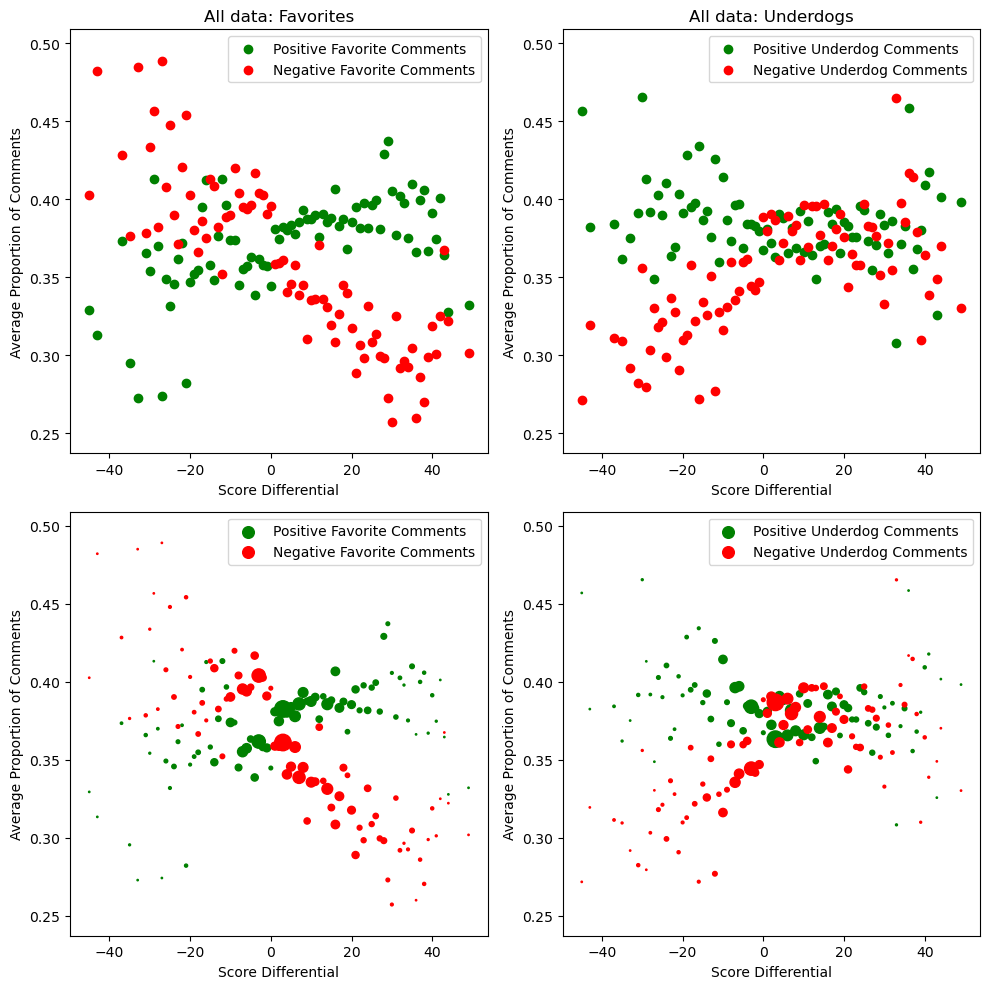

In [200]:
make_sentiment_graph(df
           , title='All data', filter_col = 'Score Differential')

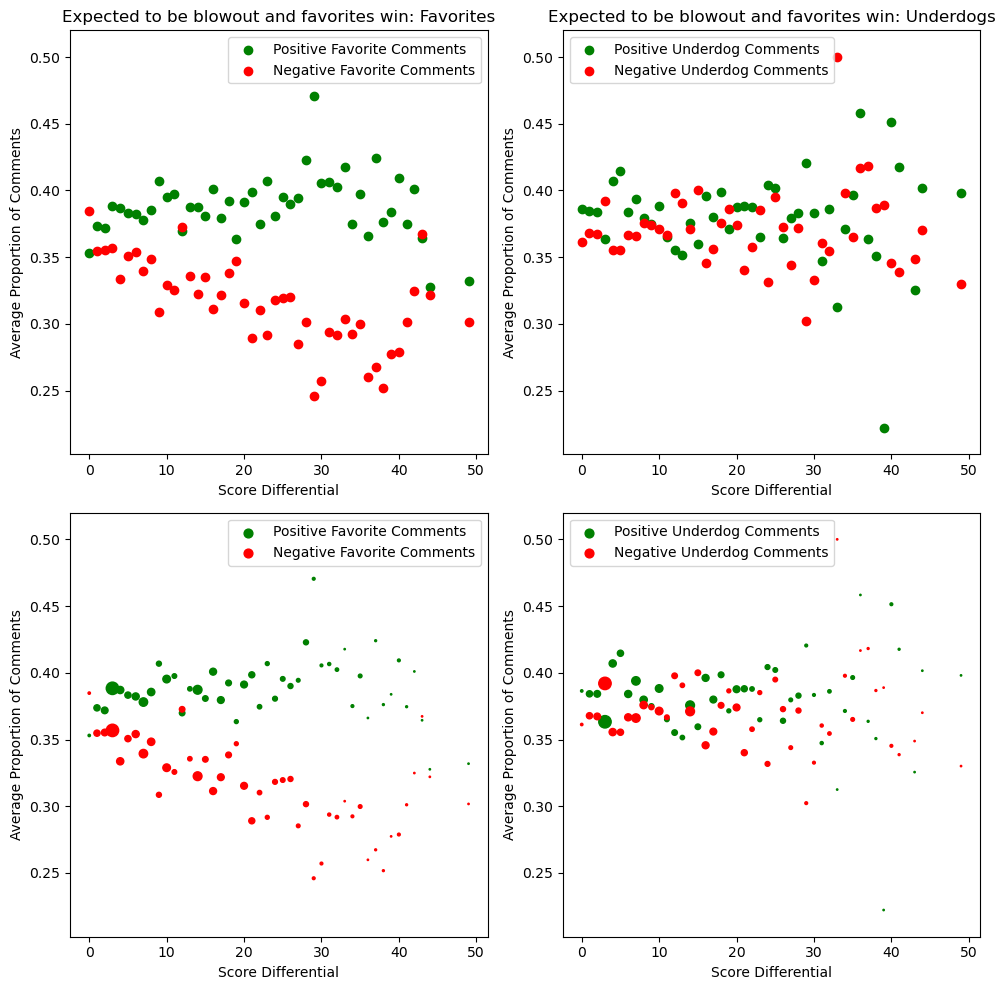

In [123]:
make_sentiment_graph(df[(df['spread_clean'] >= 4) & (df['Score Differential'] >= 0)]
           , title='Expected to be blowout and favorites win', filter_col = 'Score Differential')

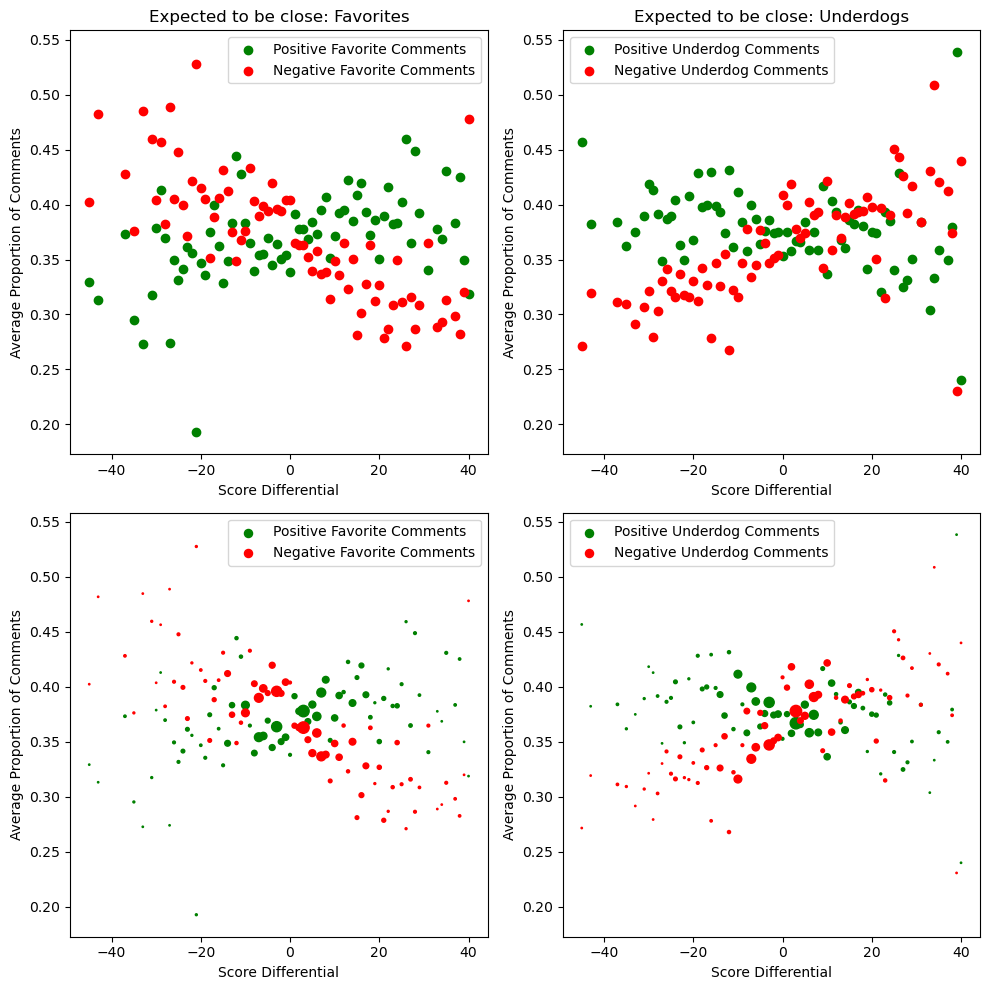

In [124]:
make_sentiment_graph(df[(df['spread_clean'] <= 4) & (df['spread_clean'] >= -4)]
           , title='Expected to be close', filter_col = 'Score Differential')

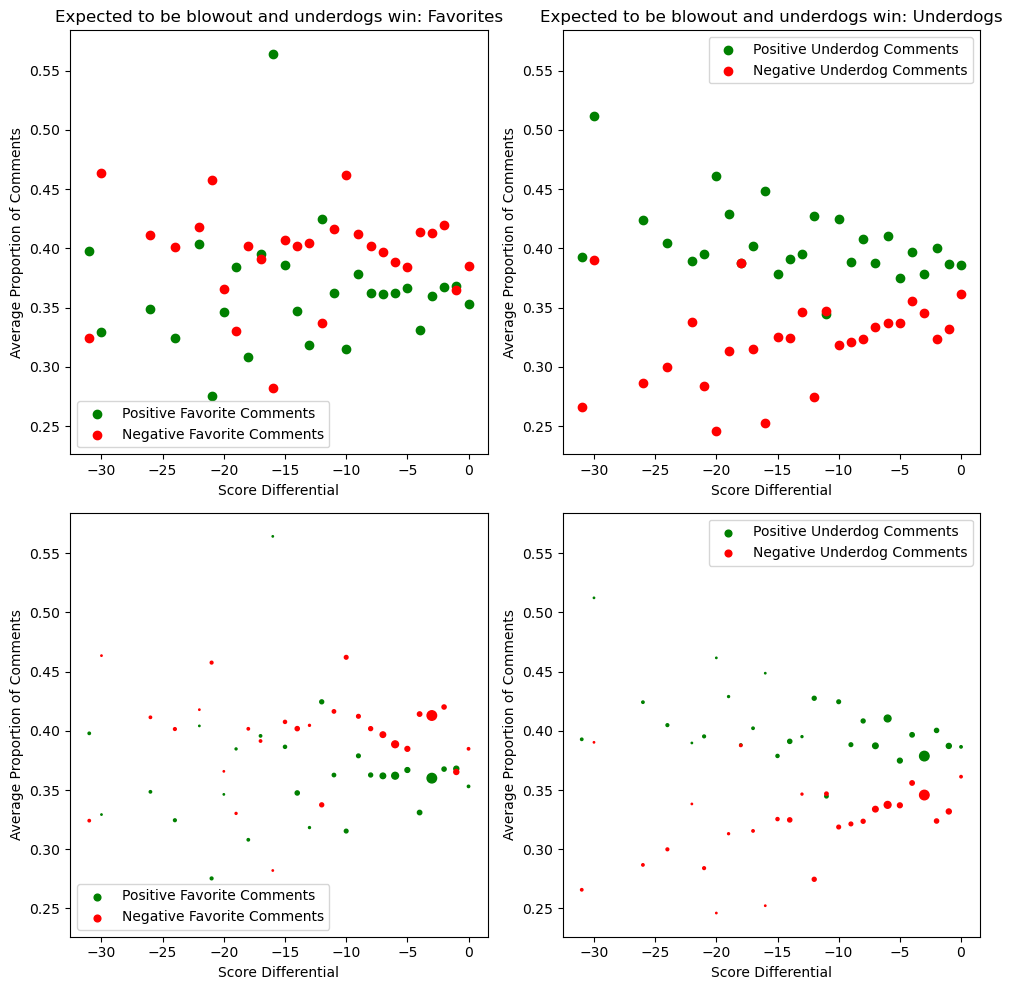

In [125]:
make_sentiment_graph(df[(df['spread_clean'] >= 4) & (df['Score Differential'] <= 0)]
           , title='Expected to be blowout and underdogs win', filter_col = 'Score Differential')

In [201]:
df['spread_w_neg'] = df['spread_clean']
df.loc[(df['Score Differential'] < 0),'spread_w_neg'] = df.loc[(df['Score Differential'] < 0),'spread_clean']*-1
df

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,favorite_pos_prop,favorite_neg_prop,Score Differential,spread_clean,Favorite_Win,prop_within3,num_switches,info_scrape_fav,info_scrape_dog,spread_w_neg
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.390000,0.370000,6,6.5,W,0.797778,4,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.333333,0.413043,-20,2.5,L,0.468889,0,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.402827,0.360424,3,10.0,W,0.341389,2,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2022,18,Sun,2023-01-08,4:25,@,Philadelphia Eagles,W 22-16,L -16,NaN,...,0.380503,0.289308,6,16.0,W,0.179444,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,16.0
1563,2022,18,Sun,2023-01-08,4:25,@,San Francisco 49ers,W 38-13,W -14,NaN,...,0.459016,0.209836,25,14.0,W,0.310278,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,14.0
1564,2022,18,Sun,2023-01-08,4:25,@,Seattle Seahawks,W 19-16 (OT),L -6,NaN,...,0.387597,0.372093,3,6.0,W,0.891667,8,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.0
1565,2022,18,Sun,2023-01-08,4:25,NaN,Dallas Cowboys,L 6-26,L -7,@,...,0.346304,0.365759,-20,7.0,L,0.064444,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-7.0


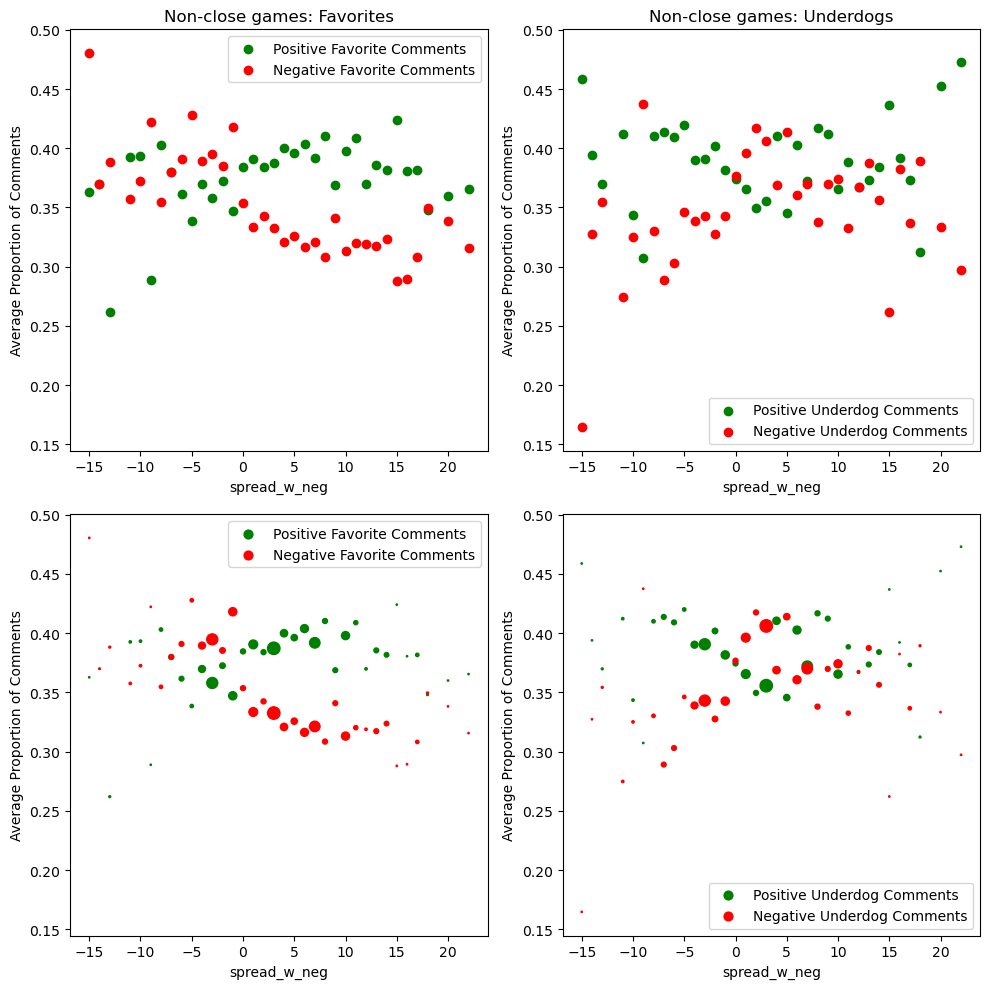

In [202]:
make_sentiment_graph(df[~(df['Score Differential'].isin(range(-4,5,1)))]
           , title='Non-close games', filter_col = 'spread_w_neg')

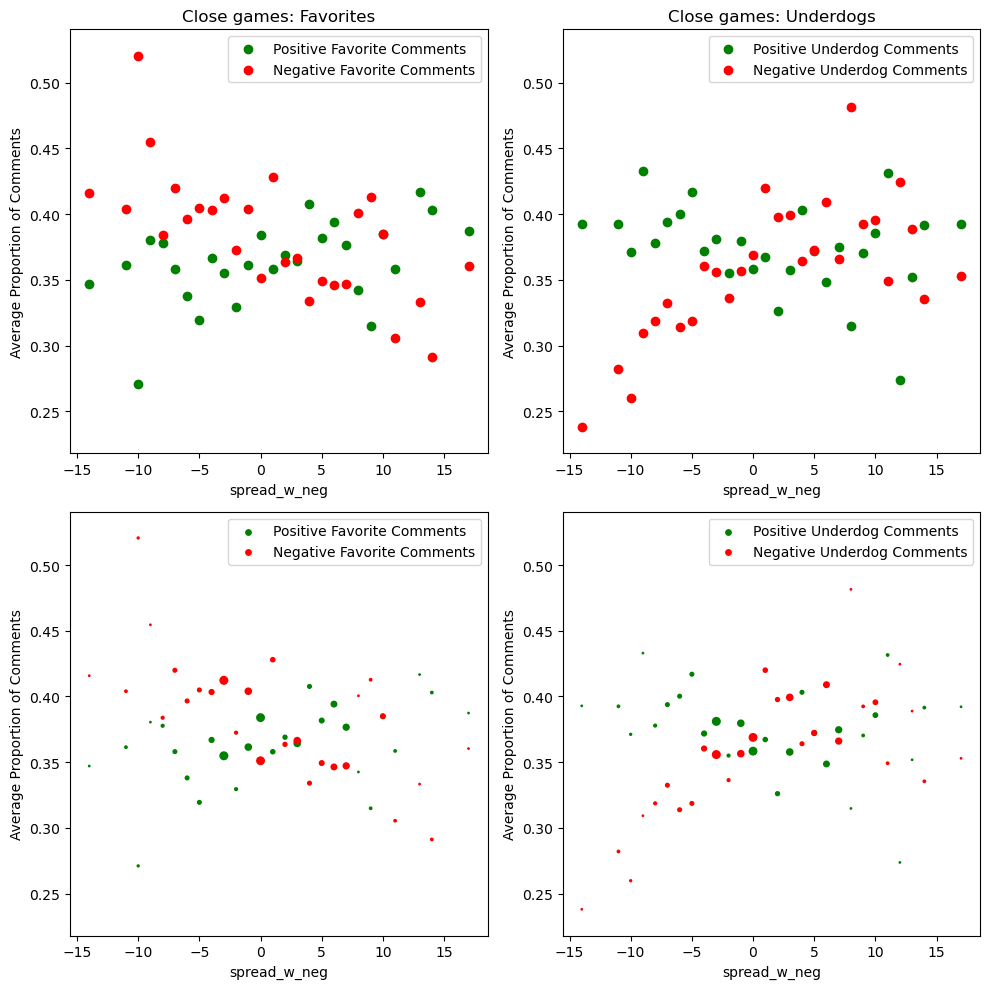

In [146]:
make_sentiment_graph(df[(df['Score Differential'].isin(range(-4,5,1)))]
           , title='Close games', filter_col = 'spread_w_neg')

In [ ]:
# plot normalized number of people vs closeness of game - suspense vs surprise paper
# fans of team 1, fans of team 2, neutral fans

In [203]:
df['num_underdog_comments'] = df['underdog_flair'].apply(eval).apply(sum)
df['num_favorite_comments'] = df['favorite_flair'].apply(eval).apply(sum)
df['num_neutral_comments'] = df['all_comments'].apply(len) - df['num_underdog_comments'] - df['num_favorite_comments']
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,spread_clean,Favorite_Win,prop_within3,num_switches,info_scrape_fav,info_scrape_dog,spread_w_neg,num_underdog_comments,num_favorite_comments,num_neutral_comments
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0,47,32,67070
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0,88,108,29069
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,6.5,W,0.797778,4,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5,149,200,55559
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,2.5,L,0.468889,0,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5,219,138,51967
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,10.0,W,0.341389,2,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0,60,283,57749


In [204]:
for col_name in df.columns[-3:]:
    new_col_name = col_name + '_std'
    df.loc[:,new_col_name] = (df.loc[:,col_name]-np.mean(df.loc[:,col_name]))/np.std(df.loc[:,col_name])
df

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,num_switches,info_scrape_fav,info_scrape_dog,spread_w_neg,num_underdog_comments,num_favorite_comments,num_neutral_comments,num_underdog_comments_std,num_favorite_comments_std,num_neutral_comments_std
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0,47,32,67070,-0.954928,-1.503457,1.085438
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0,88,108,29069,-0.413668,-0.648172,-2.165949
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,4,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5,149,200,55559,0.391621,0.387174,0.100550
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5,219,138,51967,1.315723,-0.310559,-0.206783
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,2,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0,60,283,57749,-0.783309,1.321235,0.287928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2022,18,Sun,2023-01-08,4:25,@,Philadelphia Eagles,W 22-16,L -16,NaN,...,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,16.0,102,318,50721,-0.228848,1.715116,-0.313392
1563,2022,18,Sun,2023-01-08,4:25,@,San Francisco 49ers,W 38-13,W -14,NaN,...,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,14.0,31,305,37990,-1.166151,1.568818,-1.402663
1564,2022,18,Sun,2023-01-08,4:25,@,Seattle Seahawks,W 19-16 (OT),L -6,NaN,...,8,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.0,44,129,73401,-0.994532,-0.411843,1.627122
1565,2022,18,Sun,2023-01-08,4:25,NaN,Dallas Cowboys,L 6-26,L -7,@,...,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-7.0,65,257,58307,-0.717302,1.028637,0.335671


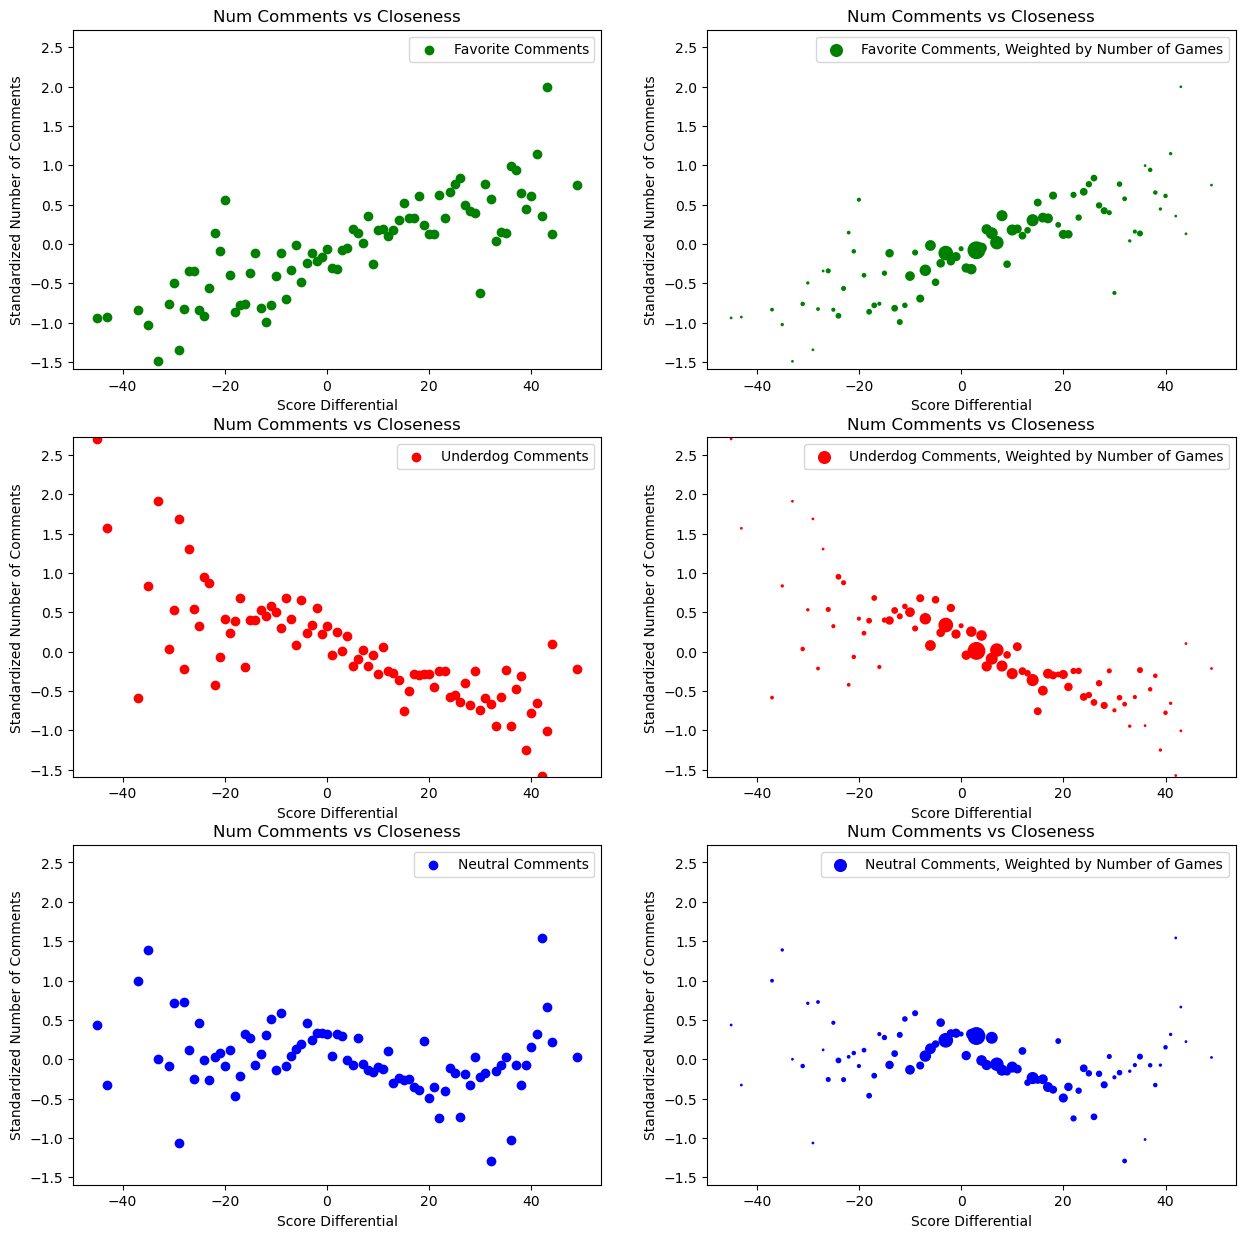

In [205]:
title='Num Comments vs Closeness'
filter_col = 'Score Differential'
scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
mean_fav_comments = []
mean_dog_comments = []
mean_neu_comments = []
num = []
for i in scores:
    smoll_df = df[df[filter_col]==i]
    if len(smoll_df)==0:
        num.append(0)
        mean_fav_comments.append(np.nan)
        mean_dog_comments.append(np.nan)
        mean_neu_comments.append(np.nan)
    else:
        num.append(len(smoll_df))
        mean_fav_comments.append(smoll_df['num_favorite_comments_std'].mean())
        mean_dog_comments.append(smoll_df['num_underdog_comments_std'].mean())
        mean_neu_comments.append(smoll_df['num_neutral_comments_std'].mean())

min_1 = min([x for x in mean_fav_comments if not np.isnan(x)])
min_2 = min([x for x in mean_dog_comments if not np.isnan(x)])
min_3 = min([x for x in mean_neu_comments if not np.isnan(x)])

max_1 = max([x for x in mean_fav_comments if not np.isnan(x)])
max_2 = max([x for x in mean_dog_comments if not np.isnan(x)])
max_3 = max([x for x in mean_neu_comments if not np.isnan(x)])

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0][0].set_title(title)
axs[0][0].scatter(scores, mean_fav_comments, label='Favorite Comments', color = 'g')
axs[0][0].legend()
axs[0][0].set_xlabel(filter_col)
axs[0][0].set_ylabel('Standardized Number of Comments')
axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02)

axs[0][1].set_title(title)
axs[0][1].scatter(scores, mean_fav_comments, label='Favorite Comments, Weighted by Number of Games',s=num, color = 'g')
axs[0][1].legend()
axs[0][1].set_xlabel(filter_col)
axs[0][1].set_ylabel('Standardized Number of Comments')
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02)

axs[1][0].set_title(title)
axs[1][0].scatter(scores, mean_dog_comments, label='Underdog Comments', color = 'r')
axs[1][0].legend()
axs[1][0].set_xlabel(filter_col)
axs[1][0].set_ylabel('Standardized Number of Comments')
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02)

axs[1][1].set_title(title)
axs[1][1].scatter(scores, mean_dog_comments, label='Underdog Comments, Weighted by Number of Games',s=num, color = 'r')
axs[1][1].legend()
axs[1][1].set_xlabel(filter_col)
axs[1][1].set_ylabel('Standardized Number of Comments')
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02)

axs[2][0].set_title(title)
axs[2][0].scatter(scores, mean_neu_comments, label='Neutral Comments', color = 'b')
axs[2][0].legend()
axs[2][0].set_xlabel(filter_col)
axs[2][0].set_ylabel('Standardized Number of Comments')
axs[2][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02)

axs[2][1].set_title(title)
axs[2][1].scatter(scores, mean_neu_comments, label='Neutral Comments, Weighted by Number of Games',s=num, color = 'b')
axs[2][1].legend()
axs[2][1].set_xlabel(filter_col)
axs[2][1].set_ylabel('Standardized Number of Comments')
axs[2][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02,
                  max(max_1,max_2,max_3, max_4)+0.02);

#plt.subplots_adjust(hspace=0.1);

In [ ]:
# check for within-game evolution - can you get a measure of within game closeness of play? 
# e.g. share of time teams are close to each other, how many switches are there